In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '../data/processed/one_year_price.csv'
data = pd.read_csv(file_path)
data.head()

,Date,AAPL,AMZN,EEM,GLD,JNJ,JPM,SPY,TSLA
0,2023-04-03 00:00:00-04:00,165.287750,102.410004,38.504452,184.539993,152.170090,125.811874,405.083954,194.770004
1,2023-04-04 00:00:00-04:00,164.750626,103.949997,38.504452,187.979996,153.761139,124.129982,402.836487,192.580002
2,2023-04-05 00:00:00-04:00,162.890533,101.099998,38.202572,187.830002,160.668701,124.315071,401.781738,185.520004
3,2023-04-06 00:00:00-04:00,163.785767,102.059998,38.358379,186.490005,160.222427,124.178696,403.349030,185.059998
4,2023-04-10 00:00:00-04:00,161.169724,102.169998,38.397335,185.110001,159.417206,124.587852,403.763000,184.509995


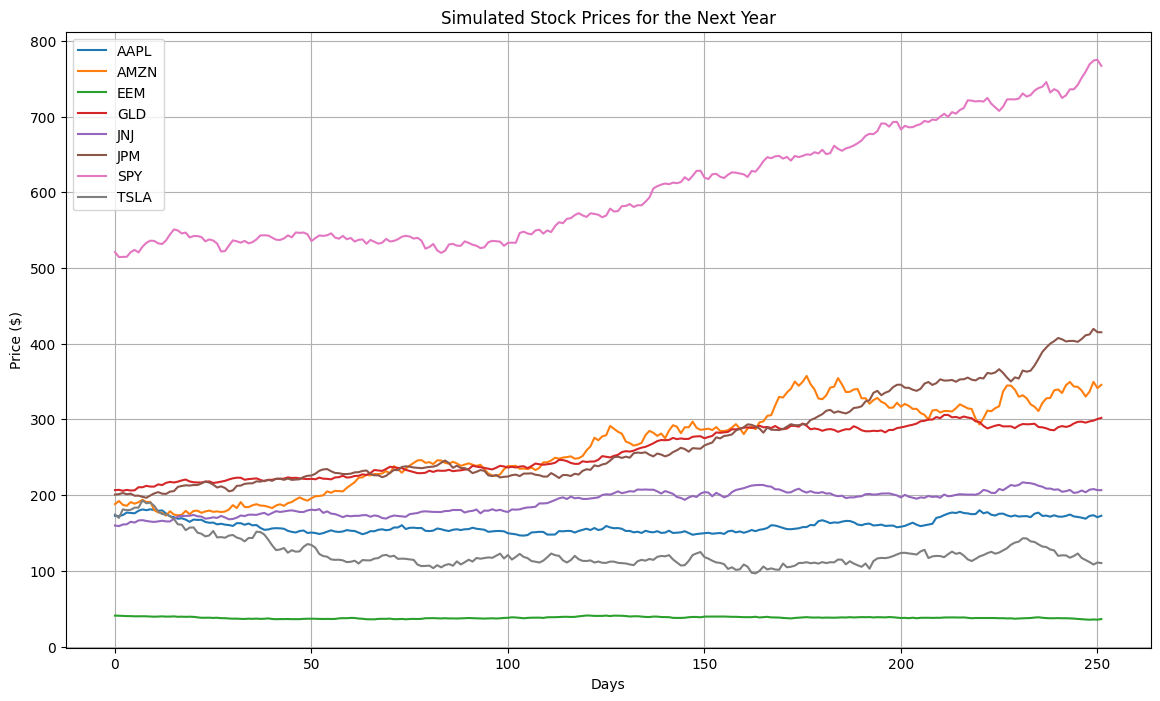

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stock_data = data

# Remove any rows with missing values to avoid calculation errors
stock_data.dropna(inplace=True)

# List of stock symbols
stock_symbols = stock_data.columns[1:]  # Adjust if the first column isn't 'Date'

# Set up the plot
plt.figure(figsize=(14, 8))

# Number of trading days to simulate
days = 252
t = np.arange(1, days + 1)

# Seed for reproducibility
np.random.seed(42)

# Loop over each stock symbol
for symbol in stock_symbols:
    # Calculate logarithmic returns
    returns = np.log(stock_data[symbol] / stock_data[symbol].shift(1))
    
    # Estimate parameters (annualized)
    mu = returns.mean() * 252
    sigma = returns.std() * np.sqrt(252)
    
    # Starting stock price (last available closing price)
    S0 = stock_data[symbol].iloc[-1]
    
    # Brownian motion
    W = np.random.standard_normal(size=days)
    W = np.cumsum(W)
    
    # Simulate prices using GBM
    prices = S0 * np.exp((mu - 0.5 * sigma**2) * t / 252 + sigma * W * np.sqrt(1/252))
    
    # Plot
    plt.plot(prices, label=symbol)

# Customize the plot
plt.title('Simulated Stock Prices for the Next Year')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()
